In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
42,1000.0,0.604100,pca_gdf_que3,0.001,0.187905,0.191102,0.593711,11946,0.632794,0.200535,0.201271,0.599921,0.1,1.0
16,0.1,0.594523,pca_gdf_que3,0.100,0.182453,0.183835,0.591498,3879,0.575435,0.122216,0.122692,0.561159,0.1,1.0
38,100.0,0.596202,pca_gdf_que3,1.000,0.168391,0.169863,0.584201,3035,0.575095,0.103686,0.103828,0.551772,0.1,1.0
35,100.0,0.570434,pca_gdf_que3,0.001,0.162383,0.163781,0.581383,7858,0.530425,0.173911,0.176532,0.586311,0.1,1.0
36,100.0,0.628649,pca_gdf_que3,0.010,0.152635,0.161718,0.576450,13061,0.642105,0.094994,0.102277,0.546556,0.1,1.0
17,0.1,0.598280,pca_gdf_que3,1.000,0.151906,0.159219,0.576036,1956,0.611311,0.134272,0.138172,0.567191,0.1,1.0
16,0.1,0.580595,pca_gdf_que3,0.100,0.149325,0.159088,0.574649,4320,0.638015,0.173926,0.176160,0.586271,0.1,1.0
30,10.0,0.563001,pca_gdf_que3,0.100,0.151053,0.158577,0.575905,12417,0.588121,0.154291,0.154787,0.577223,0.1,1.0
38,100.0,0.584928,pca_gdf_que3,1.000,0.154812,0.157235,0.577658,9761,0.603670,0.133741,0.135408,0.566740,0.1,1.0
35,100.0,0.611943,pca_gdf_que3,0.001,0.155394,0.156893,0.577441,10484,0.567673,0.113104,0.113672,0.556679,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
df_log_pca_res = pd.DataFrame()
log_data_dir = 'res_log_pca_gdf_que3_10000'
for stock in stocks:
        filename = log_data_dir + '/log_pca_gdf_{}_len{}.csv'.format(stock, data_length)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_log_pca_res = df_log_pca_res.append(df_temp)
df_log_pca_res.drop(['C', 'coef0', 'gamma', 'Unnamed: 0'], axis=1, inplace=True)
df_log_pca_res['kernel'] = 'log_pca'
df_log_pca_res.columns

Index(['f1', 'features', 'kappa', 'kernel', 'matthews', 'precision', 'r',
       'recall', 'roc_auc', 's', 'stock', 'test_f1', 'test_kappa',
       'test_matthews', 'test_precision', 'test_recall', 'test_roc_auc',
       'train_f1', 'train_kappa', 'train_matthews', 'train_precision',
       'train_recall', 'train_roc_auc'],
      dtype='object')

In [9]:
df_log_pca_res = df_log_pca_res[df_log_pca_res['r'] == r]
df_log_pca_res = df_log_pca_res[df_log_pca_res['s'] == s]
df_log_pca_res

,f1,features,kappa,kernel,matthews,precision,r,recall,roc_auc,s,...,test_matthews,test_precision,test_recall,test_roc_auc,train_f1,train_kappa,train_matthews,train_precision,train_recall,train_roc_auc
1,0.556475,pca_gdf_que3,0.105052,log_pca,0.107370,0.566487,0.1,0.557488,0.552626,1.0,...,0.114997,0.554800,0.644620,0.556590,0.567645,0.127061,0.127116,0.569574,0.565963,0.563523
1,0.520605,pca_gdf_que3,0.106838,log_pca,0.109619,0.563598,0.1,0.492483,0.553804,1.0,...,0.064962,0.538542,0.512389,0.532457,0.530020,0.119228,0.120005,0.559548,0.505082,0.559474
1,0.584140,pca_gdf_que3,0.146026,log_pca,0.149814,0.579628,0.1,0.603258,0.573182,1.0,...,0.117594,0.579447,0.685688,0.556822,0.590637,0.144562,0.144839,0.576775,0.605457,0.572179
1,0.553285,pca_gdf_que3,0.118477,log_pca,0.120214,0.569318,0.1,0.544903,0.559237,1.0,...,0.136839,0.572642,0.597441,0.568303,0.551102,0.109611,0.109704,0.553088,0.549873,0.554779
1,0.532570,pca_gdf_que3,0.129580,log_pca,0.131716,0.574398,0.1,0.502403,0.564964,1.0,...,0.080933,0.546680,0.522299,0.540443,0.556600,0.141202,0.141573,0.566320,0.548368,0.570498
1,0.547990,pca_gdf_que3,0.114350,log_pca,0.116698,0.553295,0.1,0.552368,0.557422,1.0,...,0.104230,0.561129,0.530109,0.552073,0.556068,0.120994,0.121326,0.557228,0.556041,0.560418
1,0.496852,pca_gdf_que3,0.086565,log_pca,0.089737,0.546596,0.1,0.465254,0.543549,1.0,...,0.056900,0.528588,0.457114,0.528160,0.511579,0.090205,0.090830,0.540707,0.487109,0.544979
1,0.556273,pca_gdf_que3,0.119804,log_pca,0.121349,0.569224,0.1,0.550976,0.560236,1.0,...,0.124058,0.574055,0.550441,0.562030,0.556002,0.127404,0.127571,0.562119,0.551112,0.563656
1,0.587148,pca_gdf_que3,0.127399,log_pca,0.128971,0.578228,0.1,0.602597,0.563778,1.0,...,0.104307,0.533572,0.611910,0.551808,0.606038,0.147119,0.147934,0.579214,0.635692,0.573339
1,0.596550,pca_gdf_que3,0.134543,log_pca,0.136181,0.573384,0.1,0.625523,0.567402,1.0,...,0.096453,0.562112,0.530273,0.548214,0.611158,0.158541,0.159510,0.587424,0.637629,0.578922


In [10]:
df_all = pd.merge(df_all, df_log_pca_res, on='stock', suffixes=['', '_pca'])

In [11]:
df_all

,C,f1_svm,features,gamma,kappa_svm,matthews_svm,roc_auc_svm,stock,test_f1_svm,test_kappa_svm,...,test_matthews,test_precision_pca,test_recall_pca,test_roc_auc,train_f1_pca,train_kappa_pca,train_matthews_pca,train_precision_pca,train_recall_pca,train_roc_auc_pca
0,1000.0,0.604100,pca_gdf_que3,0.001,0.187905,0.191102,0.593711,11946,0.632794,0.200535,...,0.196109,0.610546,0.634615,0.597808,0.614259,0.199522,0.199781,0.601283,0.627944,0.599685
1,0.1,0.594523,pca_gdf_que3,0.100,0.182453,0.183835,0.591498,3879,0.575435,0.122216,...,0.118599,0.554337,0.561616,0.559302,0.591094,0.178940,0.178984,0.587692,0.594641,0.589460
2,100.0,0.596202,pca_gdf_que3,1.000,0.168391,0.169863,0.584201,3035,0.575095,0.103686,...,0.105001,0.562208,0.585770,0.552392,0.586730,0.176927,0.176952,0.589092,0.584456,0.588458
3,100.0,0.570434,pca_gdf_que3,0.001,0.162383,0.163781,0.581383,7858,0.530425,0.173911,...,0.153733,0.582621,0.427824,0.573452,0.541340,0.154967,0.155922,0.572719,0.514104,0.577196
4,100.0,0.628649,pca_gdf_que3,0.010,0.152635,0.161718,0.576450,13061,0.642105,0.094994,...,0.116457,0.581767,0.587287,0.558194,0.592914,0.149421,0.149649,0.581316,0.605283,0.574608
5,0.1,0.598280,pca_gdf_que3,1.000,0.151906,0.159219,0.576036,1956,0.611311,0.134272,...,0.132731,0.557762,0.620482,0.565974,0.595914,0.131891,0.132552,0.570059,0.624362,0.565795
6,0.1,0.580595,pca_gdf_que3,0.100,0.149325,0.159088,0.574649,4320,0.638015,0.173926,...,0.165252,0.596675,0.649524,0.581875,0.593738,0.179115,0.179624,0.591343,0.597938,0.589344
7,10.0,0.563001,pca_gdf_que3,0.100,0.151053,0.158577,0.575905,12417,0.588121,0.154291,...,0.162515,0.565217,0.645390,0.580600,0.576229,0.155373,0.155777,0.582870,0.571219,0.577578
8,100.0,0.584928,pca_gdf_que3,1.000,0.154812,0.157235,0.577658,9761,0.603670,0.133741,...,0.132257,0.558537,0.678854,0.564351,0.591908,0.146927,0.147070,0.580525,0.603811,0.573388
9,100.0,0.611943,pca_gdf_que3,0.001,0.155394,0.156893,0.577441,10484,0.567673,0.113104,...,0.114889,0.538596,0.628454,0.556889,0.602657,0.148665,0.149409,0.579710,0.628038,0.574090


In [12]:
df_all['test_matthews_pca'] = df_all['test_matthews']
df_all['matthews_pca'] = df_all['matthews']

In [13]:
all_columns = ['matthews_svm', 'matthews_pca', 'matthews_log',  'test_matthews_svm', 'test_matthews_pca', 'test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_pca,matthews_log,test_matthews_svm,test_matthews_pca,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.187980,0.186824,0.201271,0.196109,0.203627,0.593711,0.592373,0.599921,0.601087,11946
1,0.183835,0.172003,0.178656,0.122692,0.118599,0.120812,0.591498,0.588843,0.561159,0.560288,3879
2,0.169863,0.164291,0.167115,0.103828,0.105001,0.099310,0.584201,0.583085,0.551772,0.549537,3035
3,0.163781,0.167966,0.146384,0.176532,0.153733,0.171235,0.581383,0.572852,0.586311,0.584512,7858
4,0.161718,0.146424,0.143094,0.102277,0.116457,0.110004,0.576450,0.571097,0.546556,0.555039,13061
5,0.159219,0.158605,0.152838,0.138172,0.132731,0.133788,0.576036,0.574598,0.567191,0.566273,1956
6,0.159088,0.157729,0.156657,0.176160,0.165252,0.163789,0.574649,0.577752,0.586271,0.581178,4320
7,0.158577,0.151370,0.150172,0.154787,0.162515,0.154446,0.575905,0.573432,0.577223,0.576707,12417
8,0.157235,0.148084,0.144700,0.135408,0.132257,0.132214,0.577658,0.571695,0.566740,0.564652,9761
9,0.156893,0.154994,0.158982,0.113672,0.114889,0.103611,0.577441,0.578350,0.556679,0.551208,10484


In [14]:
(df_all['matthews_pca'] - df_all['matthews_log']).mean()

-0.00022959210251179534

In [25]:
len(df_all[df_all['matthews_pca'] > df_all['matthews_log']]), len(df_all)

(28, 53)

In [15]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

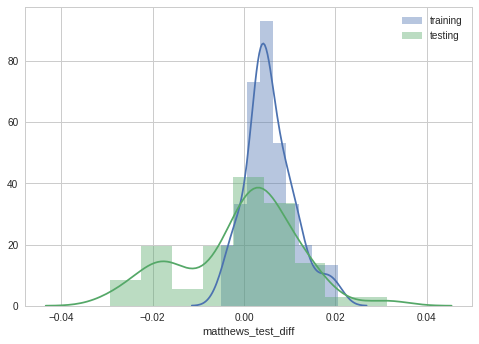

In [16]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

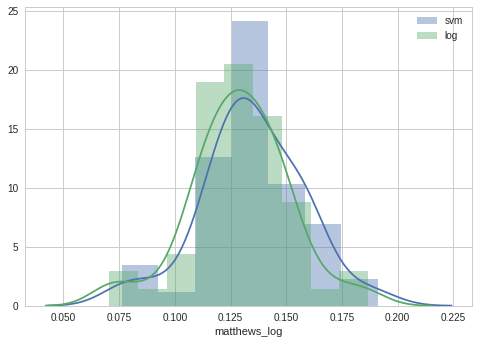

In [17]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [18]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.3019326064477755, -0.040255954492383)

In [19]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(46, 31, 53)

In [20]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_pca,matthews_log,test_matthews_svm,test_matthews_pca,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.187980,0.186824,0.201271,0.196109,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.146424,0.143094,0.102277,0.116457,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.145458,0.142170,0.113372,0.123638,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.149814,0.148600,0.114780,0.117594,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.139719,0.142499,0.157434,0.144708,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.139116,0.145601,0.130367,0.135144,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.137441,0.141614,0.104201,0.113720,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.121639,0.137272,0.147294,0.149432,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.125656,0.131577,0.132628,0.153968,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.127601,0.125630,0.117727,0.134307,0.143575,0.563687,0.561209,0.555870,0.570249,1907


In [21]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(40, 30, 53)

In [22]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_pca,matthews_log,test_matthews_svm,test_matthews_pca,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.187980,0.186824,0.201271,0.196109,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.146424,0.143094,0.102277,0.116457,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.145458,0.142170,0.113372,0.123638,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.149814,0.148600,0.114780,0.117594,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.139719,0.142499,0.157434,0.144708,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.139116,0.145601,0.130367,0.135144,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.137441,0.141614,0.104201,0.113720,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.121639,0.137272,0.147294,0.149432,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.125656,0.131577,0.132628,0.153968,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.127601,0.125630,0.117727,0.134307,0.143575,0.563687,0.561209,0.555870,0.570249,1907


In [23]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_pca,matthews_log,test_matthews_svm,test_matthews_pca,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.187980,0.186824,0.201271,0.196109,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.146424,0.143094,0.102277,0.116457,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.145458,0.142170,0.113372,0.123638,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.149814,0.148600,0.114780,0.117594,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.139719,0.142499,0.157434,0.144708,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.139116,0.145601,0.130367,0.135144,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.137441,0.141614,0.104201,0.113720,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.121639,0.137272,0.147294,0.149432,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.125656,0.131577,0.132628,0.153968,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.127601,0.125630,0.117727,0.134307,0.143575,0.563687,0.561209,0.555870,0.570249,1907
